### Import Package

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

### Load Data

In [3]:
df1 = pd.read_csv('C:/Users/HP/Downloads/CHALLENGE_GOLD/data.csv',encoding ='latin-1')
df_kamusalay = pd.read_csv('C:/Users/HP/Downloads/CHALLENGE_GOLD/new_kamusalay.csv',encoding = 'latin-1')

In [4]:
df1.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [5]:
df_kamusalay.head()

,Teks,Arti
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


### Dropping Duplicates Values

In [6]:
df1.shape

(13169, 13)

In [7]:
df1 = df1.drop_duplicates()

In [8]:
df1.shape

(13044, 13)

### Cleansing Emoticon, Punctuation, Unnecessary Word, and Replacement Alay Words

In [9]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords 

factory = StemmerFactory()
stemmer = factory.create_stemmer()
kamus_stopword = stopwords.words('indonesian')
more_stopword = ['sih','nya', 'iya', 'nih', 'biar', 'tau', 'kayak', 'banget','ya']
kamus_stopword = kamus_stopword+more_stopword

def lowercase(teks):
    teks_baru = teks.lower()
    return teks_baru

def stemming(teks):
    return stemmer.stem(teks)

def replacement_alay(teks):
    kamusalay_map = dict(zip(df_kamusalay['Teks'], df_kamusalay['Arti']))
    for word in kamusalay_map:
        return ' '.join([kamusalay_map[word] if word in kamusalay_map else word for word in teks.split(' ')])

def remove_worduncess(teks):
    teks = re.sub(r':',' ', teks) #Menghilangkan tanda baca :
    teks = re.sub('[0-9]+',' ', teks) #Menghilangkan angka-angka
    teks = re.sub('\n',' ',teks) #Menghilangkan tab
    teks = re.sub('  +',' ',teks) #Menghilangkan ekstra spasi
    teks = re.sub(r'#', '', teks) #Menghilangkan hashtag
    teks = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',teks) #Menghilangkan link/web
    return teks
                        
def remove_punctuation(teks):
    teks = re.sub(r'[^\w\s]',' ',teks) #Menghilangkan tanda baca
    return teks

def remove_rt(teks):
    teks = re.sub('rt',' ',teks) #Menghilangkan kata rt
    teks = re.sub('  +',' ',teks) #Menghilangkan ekstra spasi
    return teks

def remove_user(teks):
    teks = re.sub('user',' ',teks) #Menghilangkan kata user
    teks = re.sub('  +',' ',teks) #Menghilangkan ekstra spasi
    return teks

def remove_emoticon(teks):
    teks = teks.replace(' \ ', ' ')
    teks = re.sub('x..', ' ', teks)
    teks = re.sub(' n ', ' ', teks)
    teks = re.sub('\+', ' ', teks)
    teks = re.sub(' +',' ', teks)
    teks = re.sub(r'\$\w*',' ',teks)
    return teks

def cleansing(teks):
    teks = lowercase(teks)
    teks = remove_emoticon(teks)
    teks = remove_worduncess(teks)
    teks = remove_punctuation(teks)
    teks = remove_rt(teks)
    teks = remove_user(teks)
    teks = replacement_alay(teks)
    teks = stemming(teks)
    return teks

### Data Clean 1

In [10]:
df1['Tweet'] = df1['Tweet'].apply(cleansing)

In [11]:
df1.head(6)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok usaha lacak perhati gue ka...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat beri tau kamu edan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku pikir kenapa aku tetap percaya pada...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau mata sipit tapi lihat d...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah lihat dongok dari awal...,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan,1,1,0,1,0,0,0,0,1,0,1,0


### Removing Stopword

In [12]:
def remove_stopword(teks):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(teks)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in kamus_stopword): 
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    return " ".join(tweets_clean)

df1['Tweet_bersih'] = df1['Tweet'].apply(lambda x: remove_stopword(x))

### Data Clean 2

In [13]:
df1

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_bersih
0,di saat semua cowok usaha lacak perhati gue ka...,1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati gue lantas remeh per...
1,siapa yang telat beri tau kamu edan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,telat edan sarap gue gaul ciga ifla cal licew
2,kadang aku pikir kenapa aku tetap percaya pada...,0,0,0,0,0,0,0,0,0,0,0,0,kadang pikir percaya tuhan jatuh kali kali kad...
3,aku itu aku dan ku tau mata sipit tapi lihat d...,0,0,0,0,0,0,0,0,0,0,0,0,ku mata sipit lihat
4,kaum cebong kafir sudah lihat dongok dari awal...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dongok dungu haha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal bicara ndasmu congor kamu yang kat...,1,1,1,0,0,0,1,0,0,1,0,0,bicara ndasmu congor kate anjing
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,kasur enak kunyuk
13166,hati hati bisu tidak dan lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh
13167,bom yang real mudah deteksi bom yang kubur sua...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah deteksi bom kubur dahsyat ledak...


In [14]:
df1.drop(df1.columns[[0]], axis = 1, inplace = True)
df1

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_bersih
0,1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati gue lantas remeh per...
1,0,1,0,0,0,0,0,0,0,0,0,0,telat edan sarap gue gaul ciga ifla cal licew
2,0,0,0,0,0,0,0,0,0,0,0,0,kadang pikir percaya tuhan jatuh kali kali kad...
3,0,0,0,0,0,0,0,0,0,0,0,0,ku mata sipit lihat
4,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dongok dungu haha
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0,bicara ndasmu congor kate anjing
13165,0,1,0,0,0,0,0,0,0,0,0,0,kasur enak kunyuk
13166,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh
13167,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah deteksi bom kubur dahsyat ledak...


In [15]:
df1.shape

(13044, 13)

In [16]:
df1['total_word'] =  df1.Tweet_bersih.apply(lambda sent: len(sent.split()))
df1['total_char'] =  df1.Tweet_bersih.apply(len)

In [17]:
df1

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_bersih,total_word,total_char
0,1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati gue lantas remeh per...,14,84
1,0,1,0,0,0,0,0,0,0,0,0,0,telat edan sarap gue gaul ciga ifla cal licew,9,45
2,0,0,0,0,0,0,0,0,0,0,0,0,kadang pikir percaya tuhan jatuh kali kali kad...,19,116
3,0,0,0,0,0,0,0,0,0,0,0,0,ku mata sipit lihat,4,19
4,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dongok dungu haha,7,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0,bicara ndasmu congor kate anjing,5,32
13165,0,1,0,0,0,0,0,0,0,0,0,0,kasur enak kunyuk,3,17
13166,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh,5,24
13167,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah deteksi bom kubur dahsyat ledak...,10,60


In [18]:
df1[['total_char','total_word']].mean()

total_char    65.489114
total_word    10.387688
dtype: float64

In [19]:
df1[['total_char','total_word']].median()

total_char    57.0
total_word     9.0
dtype: float64

In [20]:
df1[['total_char','total_word']].mode()

,total_char,total_word
0,17,5


In [21]:
df1[['total_char','total_word']].min()

total_char    0
total_word    0
dtype: int64

In [22]:
df1[['total_char','total_word']].max()

total_char    326
total_word     50
dtype: int64

In [23]:
range_total_word = df1.total_word.max() - df1.total_word.min()
range_total_word

50

In [24]:
range_total_char = df1.total_char.max() - df1.total_char.min()
range_total_char

326

In [25]:
# Cari nilai minimum
min_num = df1.total_char.min()

# Cari nilai maksimum
max_num = df1.total_char.max()

# Cari Quartile 1
q1 = df1.total_char.quantile(0.25)

# Cari Quartile 2
q2 = df1.total_char.quantile(0.5)

# Cari Quartile 3
q3 = df1.total_char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr
print("Batas bawah 'total_char' : ", lower_limit)

# Cari batas atas
upper_limit = q3+1.5*iqr
print("Batas atas 'total_char' : ", upper_limit)

# Cek apakah ada outlier dari batas bawah
if lower_limit< min_num:
  print("Tidak ada outliner dari sisi batas bawah")
else:
  print("Ada outliner dari sisi batas bawah")

# Cek apa ada outlier dari batas atas
if lower_limit< max_num:
  print("Tidak ada outliner dari sisi batas atas")
else:
  print("Ada outliner dari sisi batas batas")

Batas bawah 'total_char' :  -56.5
Batas atas 'total_char' :  179.5
Tidak ada outliner dari sisi batas bawah
Tidak ada outliner dari sisi batas atas


In [26]:
df1[['total_char','total_word']].var()

total_char    1899.335847
total_word      44.365902
dtype: float64

In [27]:
df1[['total_char','total_word']].std()

total_char    43.581370
total_word     6.660773
dtype: float64

In [28]:
df1[['total_char','total_word']].skew()

total_char    0.998391
total_word    0.970073
dtype: float64

In [29]:
df1[['total_char','total_word']].kurtosis()

total_char    1.064957
total_word    0.905655
dtype: float64

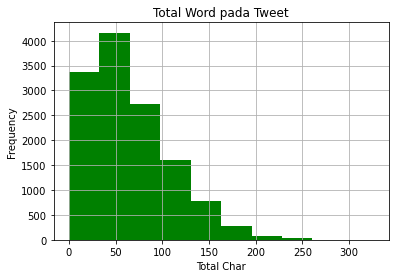

In [30]:
df1['total_char'].plot(kind = 'hist', color = 'green')
plt.title('Total Word pada Tweet')
plt.xlabel('Total Char')
plt.grid()
plt.show()

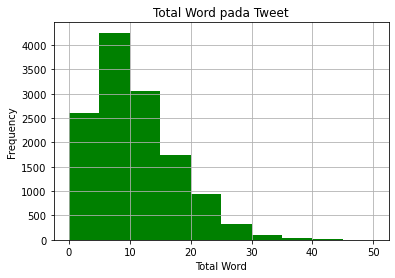

In [31]:
df1['total_word'].plot(kind = 'hist', color = 'green')
plt.title('Total Word pada Tweet')
plt.xlabel('Total Word')
plt.grid()
plt.show()

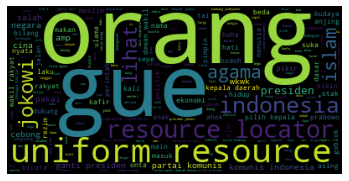

In [32]:
# Visualisasi Wordcloud
from wordcloud import WordCloud
text =' '.join(df1['Tweet_bersih'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
df1.drop(df1.columns[[12,13,14]], axis = 1, inplace = True)
df1

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0
13165,0,1,0,0,0,0,0,0,0,0,0,0
13166,0,0,0,0,0,0,0,0,0,0,0,0
13167,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
total_label_HS = df1.sum().to_frame()
total_label_HS = total_label_HS.rename(columns={0: 'total'})
total_label_HS

,total
HS,5518
Abusive,5005
HS_Individual,3540
HS_Group,1978
HS_Religion,789
HS_Race,563
HS_Physical,322
HS_Gender,304
HS_Other,3706
HS_Weak,3348


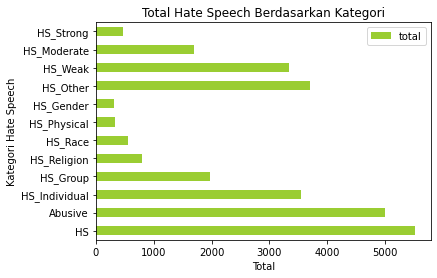

In [35]:
total_label_HS.plot(kind = 'barh', color = 'yellowgreen')
plt.title('Total Hate Speech Berdasarkan Kategori')
plt.xlabel('Total')
plt.ylabel('Kategori Hate Speech')
plt.show()

In [36]:
print('Jumlah data kalimat yang negatif :',df1[(df1['HS']==1)|(df1['Abusive']==1)].shape[0])
print('Jumlah data kalimat yang positif :',df1[(df1['HS']==0)|(df1['Abusive']==0)].shape[0])

Jumlah data kalimat yang negatif : 7261
Jumlah data kalimat yang positif : 9782


In [37]:
a = df1[(df1['HS']==1)|(df1['Abusive']==1)].shape[0]
b = df1[(df1['HS']==0)|(df1['Abusive']==0)].shape[0]

In [62]:
label_tweet = {'Negatif': [a],
        'Positif' : [b]}

df_label_tweet = pd.DataFrame(label_tweet)

In [63]:
df_label_tweet

,Negatif,Positif
0,7261,9782


In [64]:
df_label = df_label_tweet.transpose()

In [65]:
df_label.rename(columns = {0:'Jumlah'}, inplace = True)

In [66]:
df_label

,Jumlah
Negatif,7261
Positif,9782


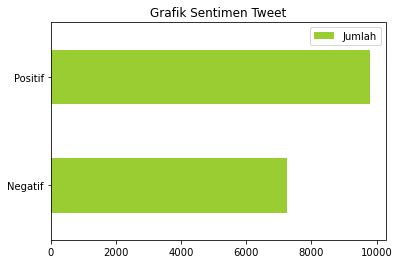

In [70]:
df_label.plot(kind='barh',color = 'yellowgreen')
plt.title('Grafik Sentimen Tweet')
plt.show()